#### Imports

In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# numerical data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Different appraoches to manage the NaN values in BMI

### fill the na values with the median

In [14]:
df1 = df.fillna(df.bmi.median())
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Drop the rows

In [16]:
df2 = df.dropna(subset = ['bmi'])
df2.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### replace missing values using descision tree 

In [43]:
from sklearn.tree import DecisionTreeClassifier
df3 = df.copy()
X = df[['age', 'gender', 'bmi']].copy()
X.gender.replace({'Male' : 0, 'Female': 1, 'Other': -1}, inplace=True)
clf = DecisionTreeClassifier(random_state=42)
X_train = X.dropna().astype('int')
X_test = X[X.bmi.isna()]
X_train, Y_train = X_train.iloc[:, :-1], X_train.iloc[:, -1]
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.15339172947647178

In [44]:
X_test = X_test.iloc[:, :-1]
df3.loc[X_test.index, 'bmi'] = clf.predict(X_test)

df3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,26.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [45]:
df3.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

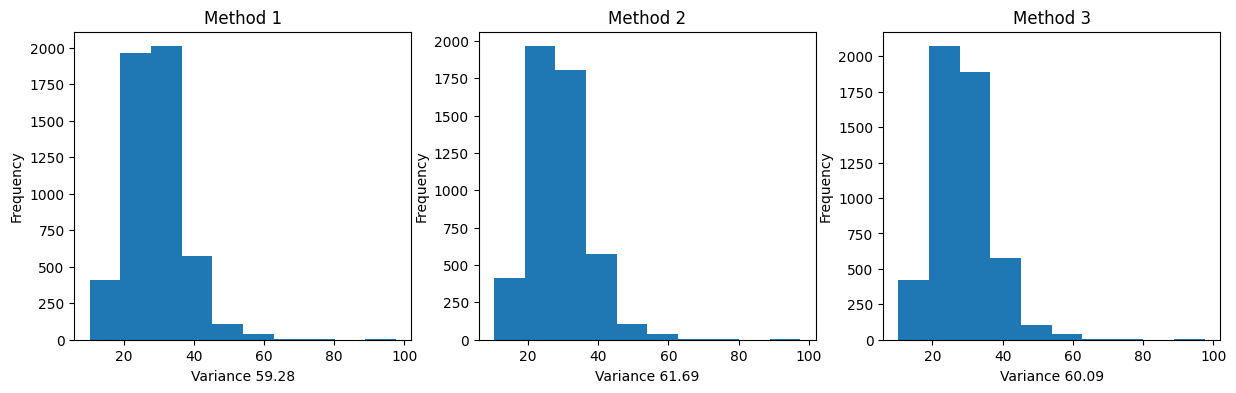

In [56]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 4, 1)
df1['bmi'].plot(kind = "hist")
plt.title("Method 1")
plt.xlabel("Variance {:.2f}".format(df1.bmi.var()))
plt.subplot(1, 4, 2)
df2['bmi'].plot(kind = "hist")
plt.title("Method 2")
plt.xlabel("Variance {:.2f}".format(df2.bmi.var()))
plt.subplot(1, 4, 3)
df3['bmi'].plot(kind = "hist")
plt.title("Method 3")
plt.xlabel("Variance {:.2f}".format(df3.bmi.var()))
plt.show()


Usually choosing the dataset with less variance is better but here I am going with method 3

Text(0.5, 1.0, 'Stroke %4.87 and No Stroke %95.13')

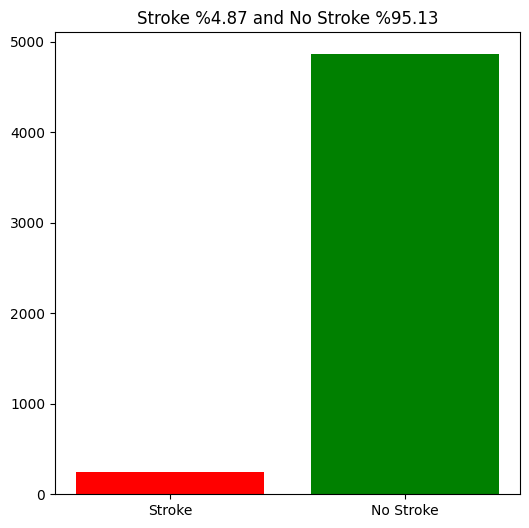

In [82]:
stroke = df3.loc[df3.stroke == 1]
no_stroke = df3.loc[df3.stroke == 0]
str_count = stroke.shape[0]
nstr_count = no_stroke.shape[0]
fig, ax = plt.subplots(figsize = (6,6))
ax.bar(['Stroke', 'No Stroke'], [str_count, nstr_count], color = ["red", "green"])
plt.title("Stroke %{:.2f} and No Stroke %{:.2f}" .format(str_count / df3.shape[0] * 100, nstr_count / df3.shape[0] * 100))
# ax.barh([1], stroke.shape[0], height = 0.7)
# ax.barh([0], no_stroke.shape[0], height = 0.7)

C:\Users\ashahvar\AppData\Local\Temp\1\ipykernel_23208\2626780566.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot = True)


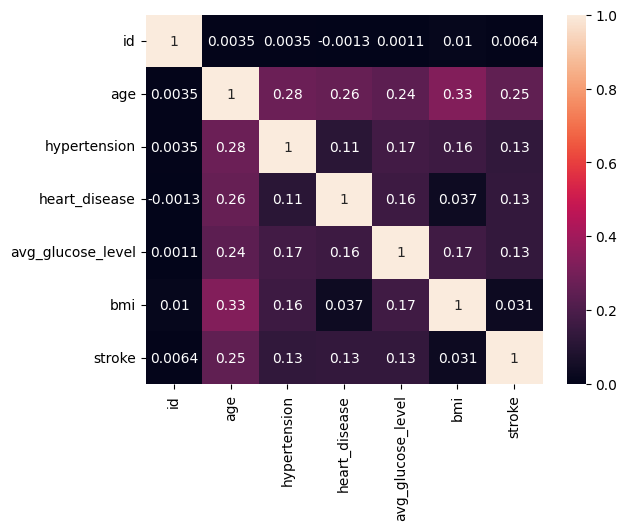

In [84]:
import seaborn as sns

sns.heatmap(df3.corr(), annot = True)
plt.show()

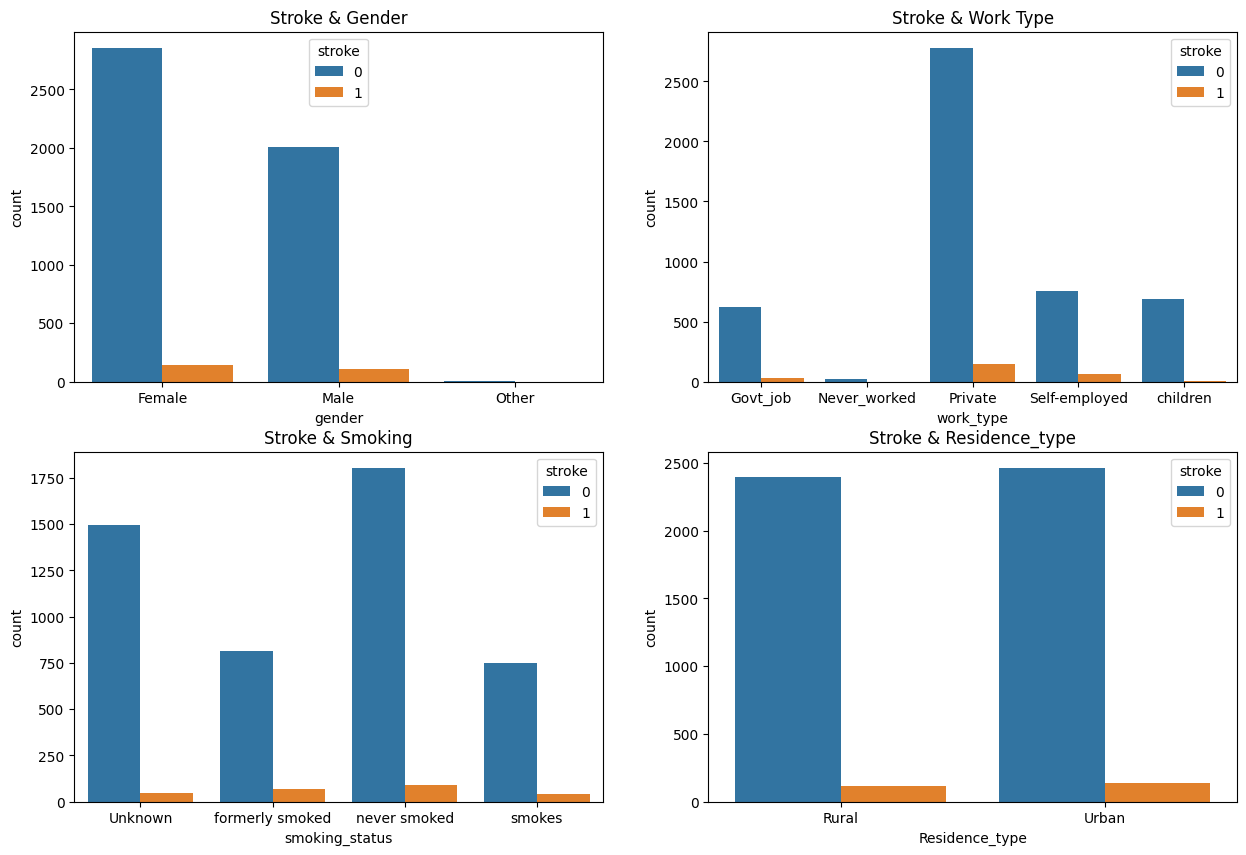

In [121]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
gender = df3.groupby(["gender", 'stroke']).agg(count=("id","count")).reset_index()
sns.barplot(x = "gender", y = "count", hue = "stroke", data = gender)
plt.title("Stroke & Gender")
plt.subplot(2, 2, 2)
work = df3.groupby(["work_type", 'stroke']).agg(count=("id","count")).reset_index()
sns.barplot(x = "work_type", y = "count", hue = "stroke", data = work)
plt.title("Stroke & Work Type")
plt.subplot(2, 2, 3)
smoke = df3.groupby(["smoking_status", 'stroke']).agg(count=("id","count")).reset_index()
sns.barplot(x = "smoking_status", y = "count", hue = "stroke", data = smoke)
plt.title("Stroke & Smoking")
plt.subplot(2, 2, 4)
residence = df3.groupby(["Residence_type", 'stroke']).agg(count=("id","count")).reset_index()
sns.barplot(x = "Residence_type", y = "count", hue = "stroke", data = residence)
plt.title("Stroke & Residence_type")
fig.tight_layout()

### Stroke & BMI

In [112]:
print("No Stroke mean: " ,no_stroke.bmi.mean())
print("Stroke mean: " ,stroke.bmi.mean())

No Stroke mean:  28.746842213536308
Stroke mean:  29.86144578313253


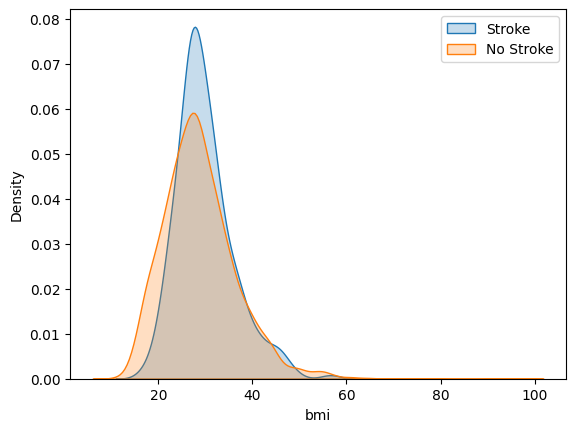

In [182]:
%matplotlib inline
sns.kdeplot(data = stroke['bmi'], fill = True, label = "Stroke")
sns.kdeplot(data = no_stroke['bmi'], fill = True, label = "No Stroke")
plt.legend()
plt.show()

#### Glocose level

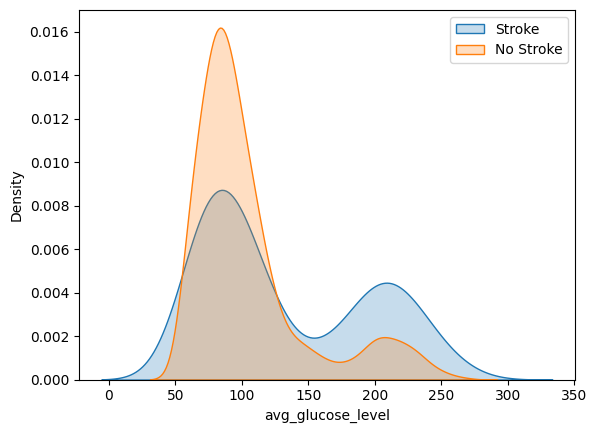

In [181]:
%matplotlib inline
sns.kdeplot(data = stroke['avg_glucose_level'], fill = True, label = "Stroke")
sns.kdeplot(data = no_stroke['avg_glucose_level'], fill = True, label = "No Stroke")
plt.legend()
plt.show()

### Stroke and Age

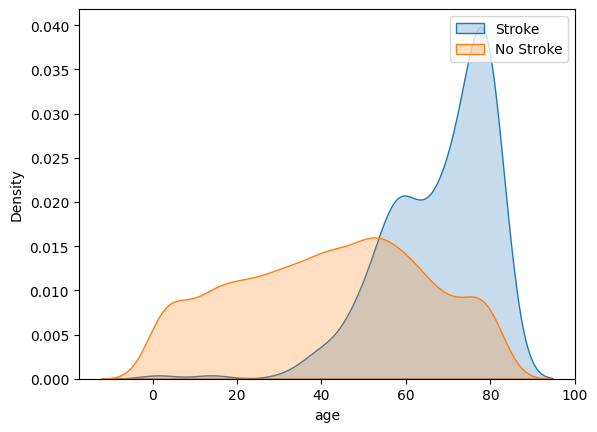

In [183]:
%matplotlib inline
sns.kdeplot(data = stroke['age'], fill = True, label = "Stroke")
sns.kdeplot(data = no_stroke['age'], fill = True, label = "No Stroke")
plt.legend()
plt.show()

In [125]:
stroke_gen = df3[df3['stroke'] == 1]['gender'].value_counts()
healthy_gen = df3[df3['stroke'] == 0]['gender'].value_counts()

female = df3['gender'].value_counts().values[0]
male =  df3['gender'].value_counts().values[1]
stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))


<BarContainer object of 2 artists>

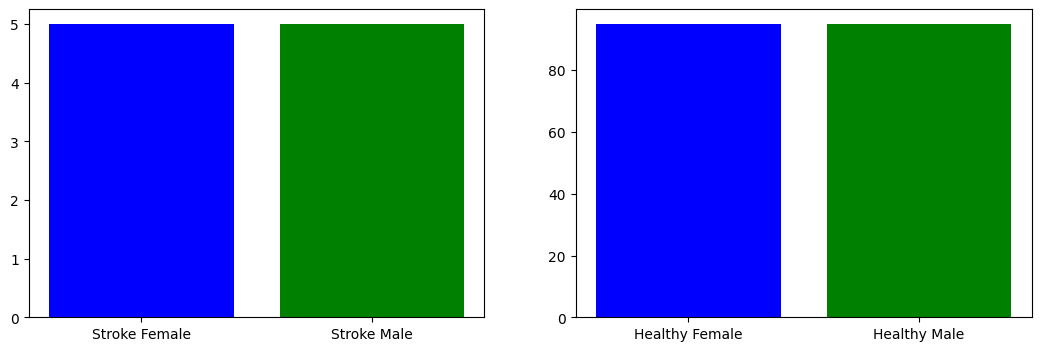

In [135]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.bar(['Stroke Female', 'Stroke Male'], [stroke_female, stroke_male], color = ["blue", "green"])
plt.subplot(1, 3, 2)
plt.bar(['Healthy Female', 'Healthy Male'], [healthy_female, healthy_male], color = ["blue", "green"])
# plt.title("Stroke %{:.2f} and No Stroke %{:.2f}" .format(str_count / df3.shape[0] * 100, nstr_count / df3.shape[0] * 100))

In [137]:
smoke = df3['smoking_status'].value_counts()
stroke_smoke = df3[df3['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = df3[df3['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = stroke_smoke.values[0] / never * 100
stroke_unknown =  stroke_smoke.values[1]  / unknown *100
stroke_former =  stroke_smoke.values[2]  / former * 100
stroke_smokes =  stroke_smoke.values[3]  / smokes *100
healthy_never = healthy_smoke.values[0] / never * 100
healthy_unknown = healthy_smoke.values[1] / unknown *100
healthy_former = healthy_smoke.values[2] / former * 100
healthy_smokes = healthy_smoke.values[3]/ smokes *100

<BarContainer object of 4 artists>

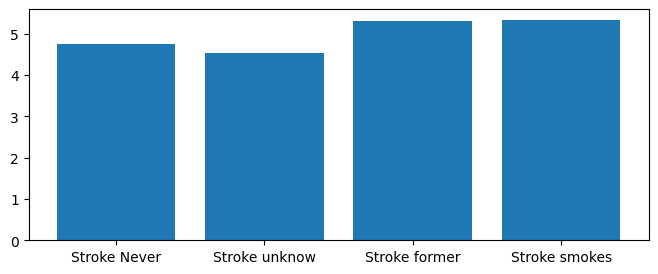

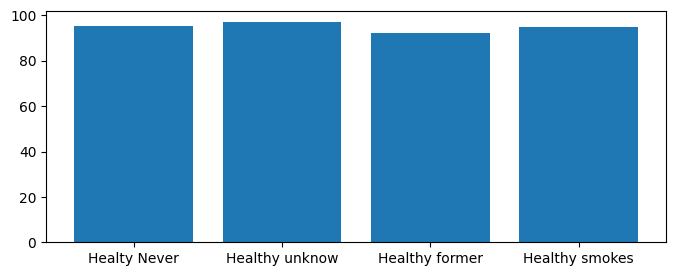

In [143]:
# plt.figure(figsize = (20, 4))
# plt.subplot(1, 3, 1)
# plt.bar(['Stroke Never', 'Stroke unknow', 'Stroke former', 'Stroke smokes'], [stroke_never, stroke_unknown, stroke_former, stroke_smokes])
# plt.subplot(1, 3, 2)
# plt.bar(['Healthy Female', 'Healthy Male'], [healthy_female, healthy_male], color = ["blue", "green"])
fig, ax = plt.subplots(figsize = (8,3))
ax.bar(['Stroke Never', 'Stroke unknow', 'Stroke former', 'Stroke smokes'], [stroke_never, stroke_unknown, stroke_former, stroke_smokes])
fig, ax = plt.subplots(figsize = (8,3))
ax.bar(['Healty Never', 'Healthy unknow', 'Healthy former', 'Healthy smokes'], [healthy_never, healthy_unknown, healthy_former, healthy_smokes])

## model selection

In [237]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

In [186]:
df = df3.copy()
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df.gender)
df['work_type'] = le.fit_transform(df.work_type)
df['Residence_type'] = le.fit_transform(df.Residence_type)
X = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df[['stroke']]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

In [195]:
#here I will use SMOTE since dataset is biased. We only have nearly 5 percent of datapoints as strokes
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train.values.ravel())

In [238]:
#model 1 = Logistic Regression
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('logistic', LogisticRegression())])
pipe.fit(X_res, y_res)
score = pipe.score(X_test, y_test)
prediction = pipe.predict(X_test)
print(score)

0.7658186562296151


In [239]:
f1 = cross_val_score(pipe,X_res,y_res,cv=10,scoring='f1').mean()
print("F1 score: ", f1)
print(classification_report(y_test, prediction))

F1 score:  0.7949571529944934
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1444
           1       0.15      0.64      0.24        89

    accuracy                           0.77      1533
   macro avg       0.56      0.71      0.55      1533
weighted avg       0.92      0.77      0.83      1533



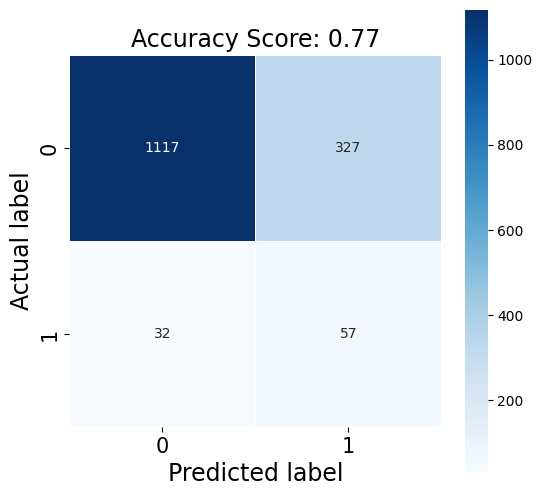

In [240]:

cm = metrics.confusion_matrix(y_test,prediction)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.2f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [241]:
#model 2: Random forest:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = 2, n_estimators = 100, random_state = 42)
rfc.fit(X_res, y_res)
score = rfc.score(X_test, y_test)
prediction = rfc.predict(X_test)
print(score)

0.8884540117416829


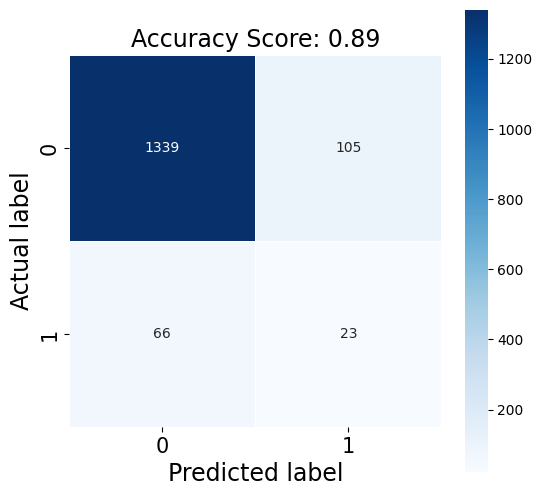

In [242]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.2f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [243]:
f1 = cross_val_score(rfc,X_res,y_res,cv=10,scoring='f1').mean()
print("F1 score: ", f1)
print(classification_report(y_test, prediction))

F1 score:  0.9429688733012119
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1444
           1       0.18      0.26      0.21        89

    accuracy                           0.89      1533
   macro avg       0.57      0.59      0.58      1533
weighted avg       0.91      0.89      0.90      1533



In [244]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_res, y_res)
score = clf.score(X_test, y_test)
prediction = clf.predict(X_test)
print(score)

0.7325505544683627


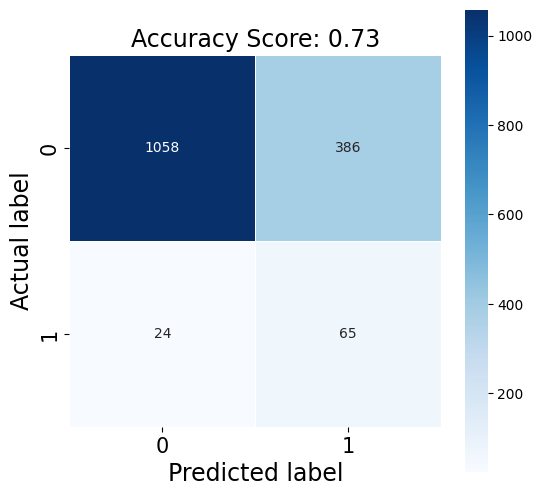

In [245]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.2f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

From the models above Random Forest Classification yields the best accuracy. We can use this model for prediction of someone who will not get a stroke. The recall for stroke is also acceptable. So we can spot someone who is likely to stroke.

In [246]:
#lets look at the imporatnce of variables in our tree
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [247]:
importances

,feature,importance
1,age,0.458
5,avg_glucose_level,0.230
6,bmi,0.177
4,work_type,0.078
0,gender,0.032
2,hypertension,0.014
3,heart_disease,0.011
